In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, TimeSeriesSplit
from sklearn.metrics import mean_squared_error,r2_score, mean_absolute_error
from pylab import rcParams
rcParams['figure.figsize']=14,7

In [2]:
data_by_month=pd.read_excel("DatabyMonth-135-8years.xlsx")
data_by_month.head()

,Truck
0,39
1,41
2,57
3,61
4,54


In [3]:
index=pd.date_range(start='2011',end='2019',freq='M',name='Date')
#index

In [4]:
data_by_month.index=index
data_by_month.head()

,Truck
Date,
2011-01-31,39
2011-02-28,41
2011-03-31,57
2011-04-30,61
2011-05-31,54


In [5]:
month=np.linspace(1,96,96).reshape(-1,1)

In [6]:
data_by_month['Month']=month.astype(int)
data_by_month

,Truck,Month
Date,,
2011-01-31,39,1
2011-02-28,41,2
2011-03-31,57,3
2011-04-30,61,4
2011-05-31,54,5
...,...,...
2018-08-31,10,92
2018-09-30,27,93
2018-10-31,19,94


In [7]:
#scalerx=StandardScaler()
#scalery=StandardScaler()

In [8]:
#data_by_month.iloc[:,[1]]=scalerx.fit_transform(data_by_month.iloc[:,[1]])

In [9]:
#data_by_month.iloc[:,[0]]=scalery.fit_transform(data_by_month.iloc[:,[0]])

In [10]:
y=data_by_month.iloc[:,0]

In [11]:
X=data_by_month.iloc[:,1].values.reshape(-1,1)

In [12]:
x_train, x_test, y_train, y_test = train_test_split(X, y,test_size=0.33 ,random_state=0)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((64, 1), (32, 1), (64,), (32,))

In [13]:
rfr=RandomForestRegressor(n_estimators=8,random_state=0)

In [14]:
rfr.fit(x_train,y_train)

RandomForestRegressor(n_estimators=8, random_state=0)

In [15]:
y_pred=rfr.predict(x_test)

In [16]:
#index=y_test.index

In [17]:
#y_test=scalery.inverse_transform(y_test)
#y_pred=scalery.inverse_transform(y_pred)
#data_by_month.iloc[:,[1]]=scalerx.inverse_transform(data_by_month.iloc[:,[1]])
#data_by_month.iloc[:,[0]]=scalery.inverse_transform(data_by_month.iloc[:,[0]])

In [18]:
y_pred=pd.DataFrame(y_pred)
y_pred.index=y_test.index
#y_test=pd.DataFrame(y_test)
#y_test.index=index

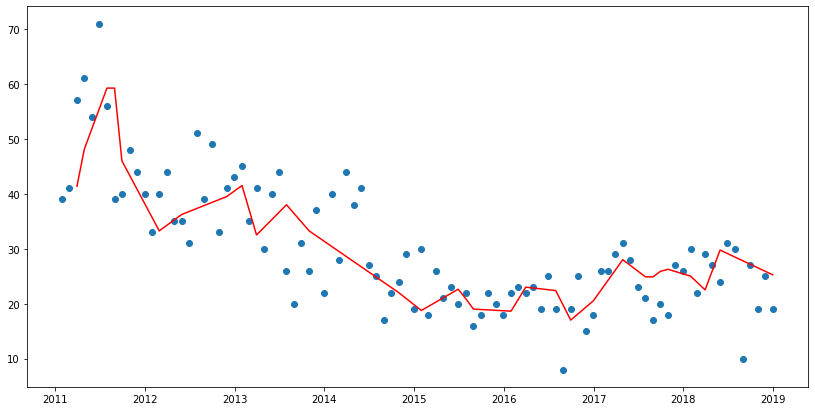

In [19]:
plt.scatter(data_by_month.index,data_by_month.Truck)
plt.plot(y_pred.sort_index(),'r')

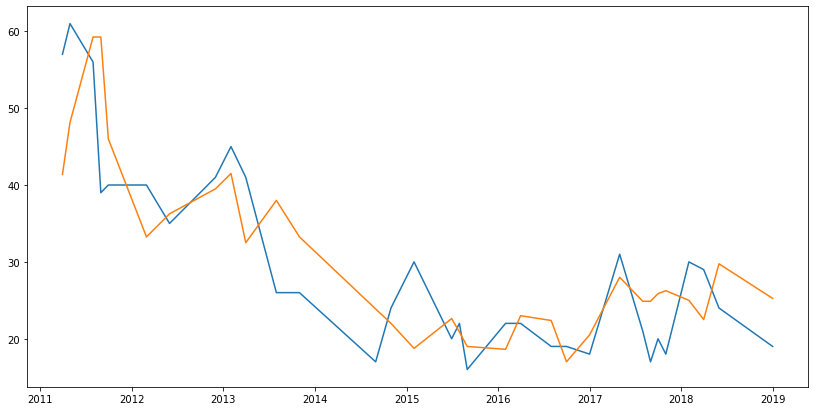

In [20]:
plt.plot(y_test.sort_index())
plt.plot(y_pred.sort_index())

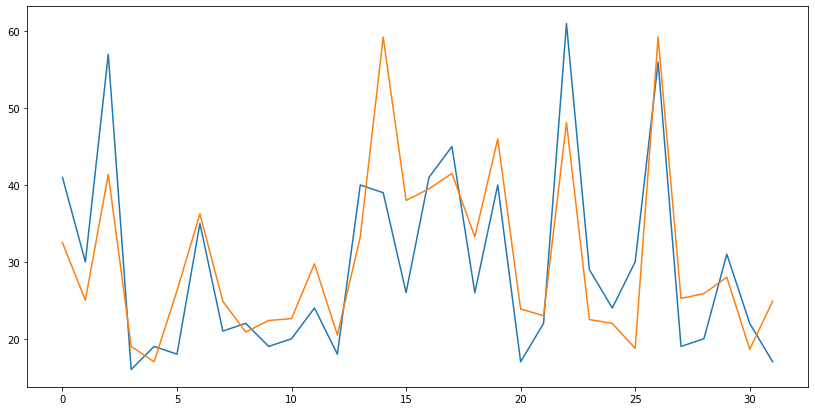

In [21]:
plt.plot(y_test.values)
plt.plot(y_pred.values)

In [22]:
mean_absolute_error(y_test,y_pred)

5.9453125

In [23]:
r2_score(y_test,y_pred)

0.6417524621659401